In [1]:
%cd "D:\Users\sean.ogara\Documents\ons-energy-analysis"

d:\Users\sean.ogara\Documents\ons-energy-analysis


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from src.visualisations.scatter_chart import scatter_chart

In [3]:
electricity_price_data = pd.read_csv("data/processed/global_electricity_household_prices.csv")
electricity_price_data.head()

,country,iso2,iso3,price
0,Lebanon,LB,LBN,0.001
1,Iran,IR,IRN,0.002
2,Syria,SY,SYR,0.004
3,Ethiopia,ET,ETH,0.005
4,Sudan,SD,SDN,0.007


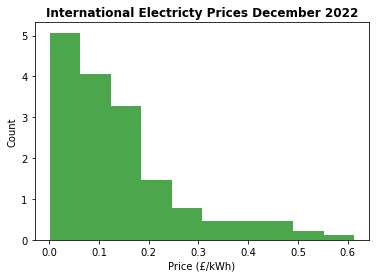

In [4]:
#distribution of prices
num_bins = 10
n, bins, patches = plt.hist(electricity_price_data['price'], num_bins,
                            density = 1,
                            color ='green',
                            alpha = 0.7)

plt.xlabel('Price (£/kWh)')
plt.ylabel('Count')
plt.title('International Electricty Prices December 2022',
          fontweight = 'bold')
plt.show()

In [5]:
#global mean price
global_mean_price = electricity_price_data['price'].mean()
global_mean_price

0.13707586206896552

In [6]:
#uk price
uk_price = electricity_price_data[electricity_price_data['iso2'] == 'GB']['price'].values[0]
uk_price

0.387

In [7]:
#ratio between uk and global mean
uk_price / global_mean_price

2.823254175890521

In [8]:
#bring in energy mix data
energy_mix_data = pd.read_csv("data/raw/owid-energy-data.csv")
energy_mix_data.tail()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22011,Zimbabwe,2022,ZWE,16320539.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#filter for 2021 as this is the most recent complete data
energy_mix_2021 = energy_mix_data.loc[energy_mix_data['year'] == 2021, :]
energy_mix_2021.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983,NaN,NaN,NaN,NaN,NaN,8.30,NaN,0.719,NaN
144,Afghanistan,2021,AFG,4.009946e+07,NaN,NaN,NaN,NaN,NaN,0.000,...,9.639,NaN,NaN,NaN,NaN,0.000,0.00,NaN,0.000,NaN
266,Africa,2021,NaN,1.393677e+09,NaN,27.27,0.238,0.796,1.11,2.705,...,2.040,0.835,19.233,9.431,59.609,14.989,20.89,42.771,2.489,1.062
324,Africa (EI),2021,NaN,NaN,NaN,27.27,0.238,NaN,1.11,NaN,...,1.996,0.835,19.233,9.432,59.609,NaN,22.78,NaN,2.540,1.062
347,Africa (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.040,NaN,NaN,NaN,NaN,NaN,20.89,NaN,2.489,NaN


In [10]:
#fileter for columns of interest
cols_of_interest = [
                    'country', 
                    'year',
                    'iso_code',
                    'population',
                    'energy_per_capita',
                    'fossil_elec_per_capita',
                    'low_carbon_energy_per_capita',
                    'low_carbon_share_energy',
                    'gas_prod_per_capita',
                    'oil_prod_per_capita',
                    'gas_production',
                    'oil_production'
                    ]           
energy_mix_2021 = energy_mix_2021[cols_of_interest]

<AxesSubplot:>

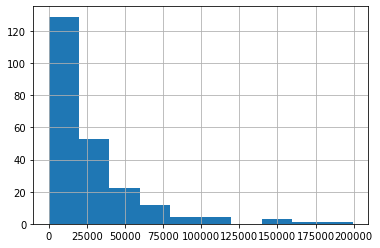

In [11]:
energy_mix_2021['energy_per_capita'].hist()

<AxesSubplot:>

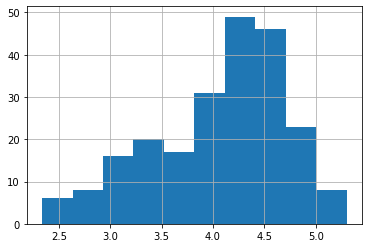

In [12]:
energy_mix_2021['energy_per_capita_log'] = np.log10(energy_mix_2021[energy_mix_2021['energy_per_capita'] != 0]['energy_per_capita'])
energy_mix_2021['energy_per_capita_log'].hist()


<AxesSubplot:>

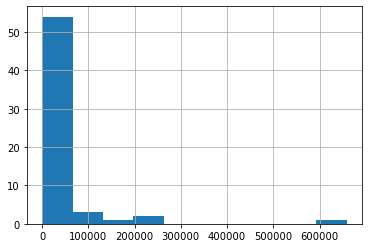

In [13]:
energy_mix_2021['gas_prod_per_capita'].hist()

<AxesSubplot:>

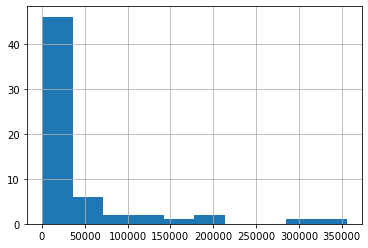

In [14]:
energy_mix_2021['oil_prod_per_capita'].hist()

<AxesSubplot:>

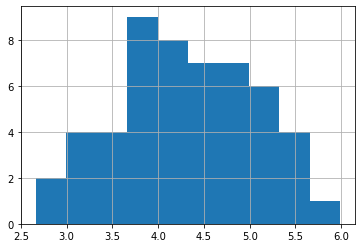

In [15]:
#combine oil and gas energy production per cap for total and log to make normally distributed
energy_mix_2021['oil_and_gas_prod_per_capita'] = energy_mix_2021['oil_prod_per_capita'] + energy_mix_2021['gas_prod_per_capita']
energy_mix_2021['oil_and_gas_prod_per_capita_log'] = np.log10(energy_mix_2021['oil_prod_per_capita'] + energy_mix_2021['gas_prod_per_capita'])
energy_mix_2021['oil_and_gas_prod_per_capita_log'].hist()

<AxesSubplot:>

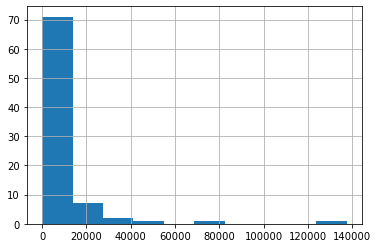

In [16]:
energy_mix_2021['low_carbon_energy_per_capita'].hist()

<AxesSubplot:>

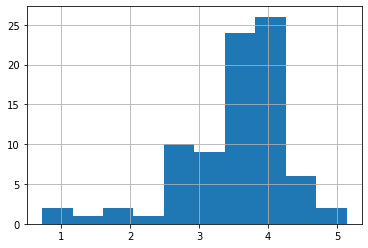

In [17]:
energy_mix_2021['low_carbon_energy_per_capita_log'] = np.log10(energy_mix_2021['low_carbon_energy_per_capita'])
energy_mix_2021['low_carbon_energy_per_capita_log'].hist()

In [18]:
#join on 2018 gdp data
joined_energy_data = pd.merge(left=energy_mix_data.loc[energy_mix_data['year'] == 2018, :][['iso_code', 'gdp']], right=energy_mix_2021, on='iso_code')
joined_energy_data['gdp_per_cap'] = joined_energy_data['gdp'] / joined_energy_data['population']
joined_energy_data['gdp_per_cap_log'] = np.log10(joined_energy_data['gdp'] / joined_energy_data['population'])


In [19]:
#join with price data
joined_energy_data = pd.merge(left=electricity_price_data[['iso3', 'price']], right=joined_energy_data, left_on='iso3', right_on='iso_code')

In [20]:
scatter_chart(data=joined_energy_data, x_var='gdp_per_cap_log', y_var='price', x_label='gdp', y_label='Price (£/kWh)', hover_labels='country')

In [21]:
scatter_chart(data=joined_energy_data, x_var='oil_and_gas_prod_per_capita_log', y_var='price', x_label='Oil and gas production per capita log(tWH)', y_label='Price (£/kWh)', hover_labels='country')

In [22]:
#global relationship of price against renewable share shows negative correlation, this could be caused by higher standards of leaving in countries with high renewable share
scatter_chart(data=joined_energy_data, x_var='low_carbon_share_energy', y_var='price', x_label='Low carbon energy share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [23]:
#eu + uk only

europe_country_codes = [
    'GBR', 'AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 
    'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 
    'SVK', 'SVN', 'ESP', 'SWE'
]

#opposite trend is true for europe but weak relationship
scatter_chart(data=joined_energy_data[joined_energy_data['iso3'].isin(europe_country_codes)], x_var='low_carbon_share_energy', y_var='price', x_label='Low carbon energy share (%)', y_label='Price (£/kWh)', hover_labels='country')

In [24]:
#plot of price vs usage per cap, again this could be driven by higher standards of living driving up the prices in countries which use more energy
scatter_chart(data=joined_energy_data, x_var='energy_per_capita_log', y_var='price', x_label='Energy usage per capita log(tWH)', y_label='Price (£/kWh)', hover_labels='country')

<AxesSubplot:>

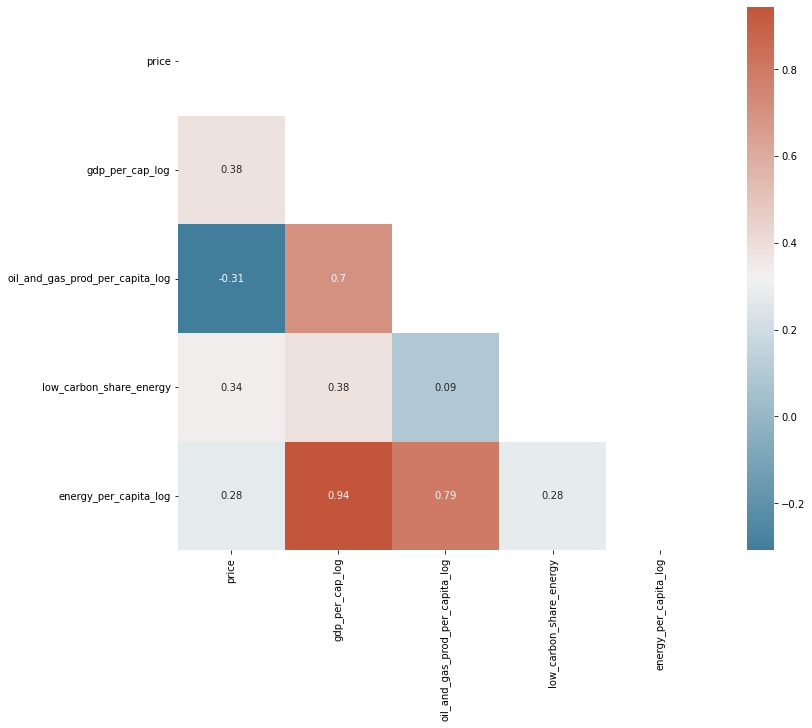

In [25]:
#remove energy per cap as it correlates with gdp per cap
features = joined_energy_data[['price', 'gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_energy', 'energy_per_capita_log']]
corr_matrix = features.corr()


f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask = mask, cmap=cmap)

In [26]:
#drop target
features.drop(['price', 'energy_per_capita_log'], axis=1, inplace=True)

#add constant to predictor variables
features = sm.add_constant(features)

#assign target var
target = joined_energy_data[['price']]

#fit linear regression model
model = sm.OLS(target, features, missing='drop').fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     21.69
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.13e-07
Time:                        15:51:45   Log-Likelihood:                 33.170
No. Observations:                  28   AIC:                            -58.34
Df Residuals:                      24   BIC:                            -53.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

d:\Python37\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
#scaled model to get feature importance
scaler = StandardScaler()

features = joined_energy_data[['gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_energy']]

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target)

In [28]:
#make regression model to explain price - does renewable mix matter? Nope, not once you've controlled for gdp per cap.

features_scaled = sm.add_constant(features_scaled)

#fit linear regression model
scaled_model = sm.OLS(target_scaled, features_scaled, missing='drop').fit()

#view model summary
print(scaled_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     21.69
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.13e-07
Time:                        15:51:45   Log-Likelihood:                -25.219
No. Observations:                  28   AIC:                             58.44
Df Residuals:                      24   BIC:                             63.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1398      0.198     -5.758      0.0

In [29]:
#create data for clustering
cluster_data = joined_energy_data[['price', 'gdp_per_cap_log', 'oil_and_gas_prod_per_capita_log', 'low_carbon_share_energy']].dropna().values

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available 

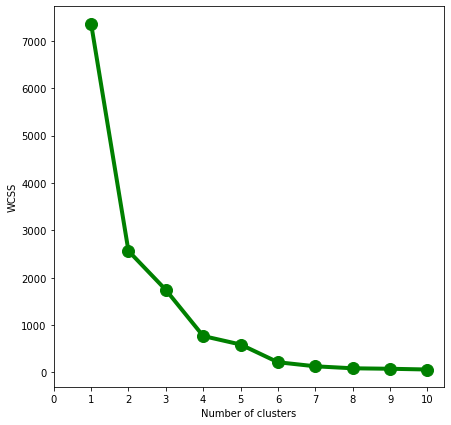

In [35]:
from sklearn.cluster import KMeans

#find the optimal number of clusters using elbow method
#using Within-Cluster Sum of Square as variance metric - WCSS
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters= i, init="random", # method for selecting initial cluster points
                      max_iter=10, # iterations before stopping
                      random_state=123)
    model.fit(cluster_data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11), WCSS, linewidth=4, markersize=12, marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
#k=4 is optimal
x=cluster_data
model = KMeans(n_clusters = 4, init = 'random', max_iter = 10)
y_clusters = model.fit_predict(cluster_data)



D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\Users\sean.ogara\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [43]:
y_clusters

array([3, 3, 0, 3, 3, 2, 3, 3, 3, 0, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 0, 1,
       2, 0, 2, 2, 2, 0])

In [47]:
x[y_clusters == 0]

array([[ 0.02      ,  4.26287443,  4.2040683 , 13.895     ],
       [ 0.041     ,  4.39624165,  4.96175855, 13.007     ],
       [ 0.059     ,  4.10482831,  3.48987021, 17.219     ],
       [ 0.062     ,  3.79777567,  2.68425543, 10.804     ],
       [ 0.075     ,  4.05055035,  3.55638368, 11.139     ],
       [ 0.077     ,  4.19966653,  4.07497795, 11.169     ],
       [ 0.138     ,  4.73102589,  4.72179999, 18.449     ],
       [ 0.181     ,  4.67926359,  4.81588428, 12.895     ],
       [ 0.613     ,  4.54486271,  3.17252646, 18.163     ]])

In [ ]:
#2D plot

plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,1],x[y_clusters == 0,0],s = 50, c = 'green', label = "1")
plt.scatter(x[y_clusters == 1,1],x[y_clusters == 1,0],s = 50, c = 'blue', label = "2")
plt.scatter(x[y_clusters == 2,1],x[y_clusters == 2,0],s = 50, c = 'black', label = "3")
plt.scatter(x[y_clusters == 3,1],x[y_clusters == 3,0],s = 50, c = 'red', label = "4")
plt.scatter(model.cluster_centers_[:,1],model.cluster_centers_[:,0], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Price (£/kWh")
plt.ylabel("GDP per cap log($)")
plt.legend()
plt.show()

In [ ]:
# display 3 var results using 3d scatter (renewable share, oil + gas prod, price)
#display 4 var results on 2d plot using pca
#get avg values for each cluster and find which cluster uk is in
#could impute values to make cluster results better
#use regression model to see if UK is outlier for elec price based on input var